<a href="https://colab.research.google.com/github/mzk8888/Finance-Markets/blob/main/SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-11-354f8532d6dc>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductName', y='SaleAmount', data=df, palette='viridis')


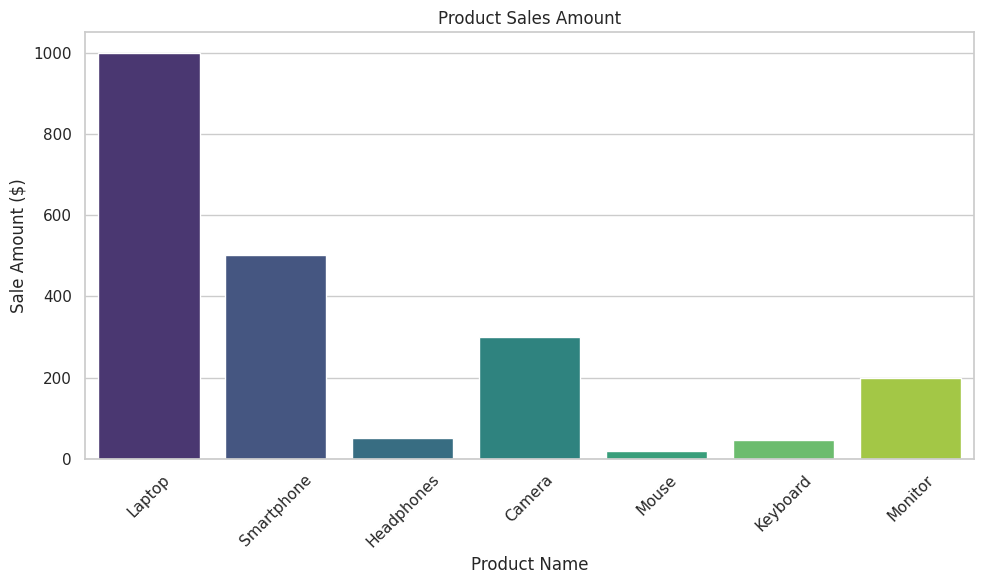

<ipython-input-11-354f8532d6dc>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='TotalSales', data=df_category_sales, palette='coolwarm')


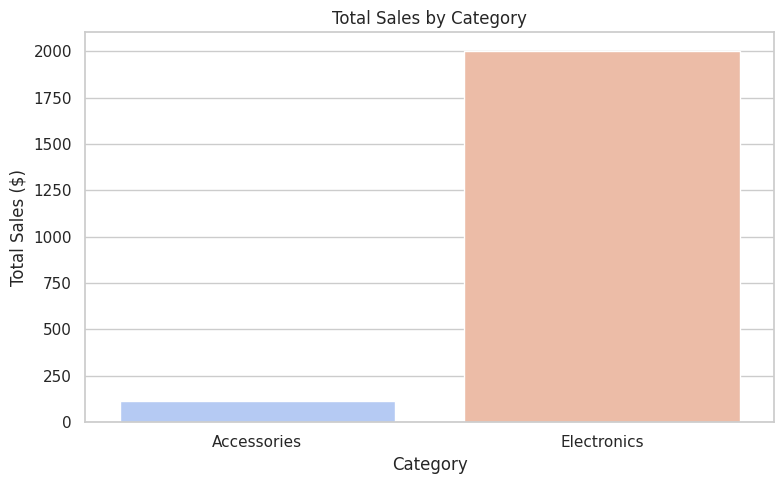

売上が500以上のデータ:
    SaleID ProductName     Category  QuantitySold  SaleAmount    SaleDate
0       1      Laptop  Electronics            10     1000.50  2024-10-25
1       2  Smartphone  Electronics            20      500.75  2024-10-26


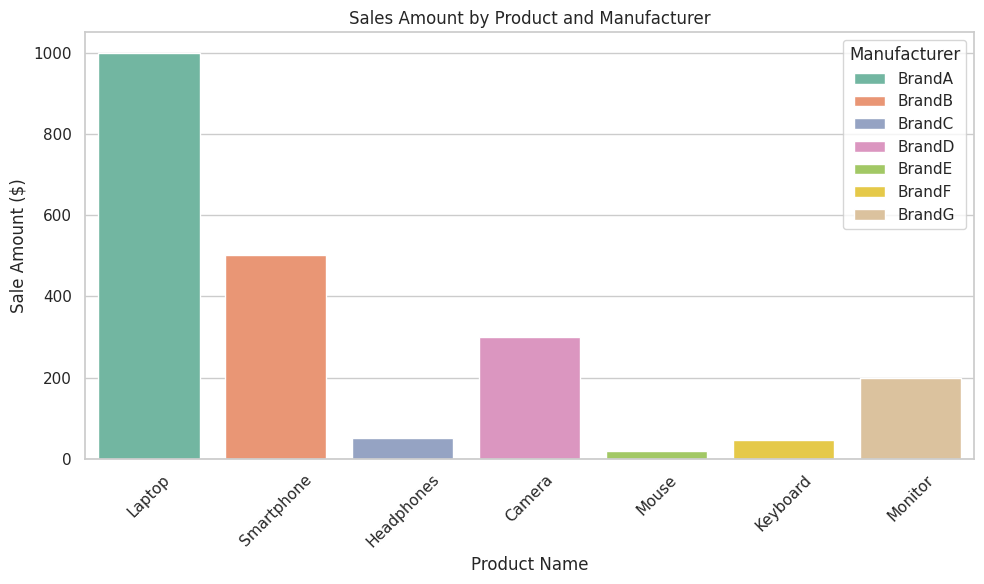

In [11]:
# 必要なライブラリをインストール（初回のみ）
# !pip install seaborn matplotlib pandas

# ライブラリのインポート
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# グラフのスタイルを設定
sns.set(style="whitegrid")

# データベース接続（新規作成）
conn = sqlite3.connect('business_data.db')
cursor = conn.cursor()

# テーブル作成
cursor.execute('''
CREATE TABLE IF NOT EXISTS Sales (
    SaleID INTEGER PRIMARY KEY AUTOINCREMENT,
    ProductName TEXT,
    Category TEXT,
    QuantitySold INTEGER,
    SaleAmount REAL,
    SaleDate TEXT
)
''')

# データ挿入
sales_data = [
    ('Laptop', 'Electronics', 10, 1000.50, '2024-10-25'),
    ('Smartphone', 'Electronics', 20, 500.75, '2024-10-26'),
    ('Headphones', 'Accessories', 50, 50.20, '2024-10-27'),
    ('Camera', 'Electronics', 5, 300.40, '2024-10-28'),
    ('Mouse', 'Accessories', 30, 20.10, '2024-10-29'),
    ('Keyboard', 'Accessories', 15, 45.00, '2024-10-30'),
    ('Monitor', 'Electronics', 8, 200.00, '2024-11-01')
]

cursor.executemany('''
INSERT INTO Sales (ProductName, Category, QuantitySold, SaleAmount, SaleDate)
VALUES (?, ?, ?, ?, ?)
''', sales_data)

# コミットして保存
conn.commit()

# データを読み込み可視化用データフレーム作成
query = 'SELECT * FROM Sales'
df = pd.read_sql_query(query, conn)

# データの可視化
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductName', y='SaleAmount', data=df, palette='viridis')
plt.title('Product Sales Amount')
plt.xlabel('Product Name')
plt.ylabel('Sale Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# カテゴリーごとの総売上の可視化
category_sales_query = '''
SELECT Category, SUM(SaleAmount) AS TotalSales
FROM Sales
GROUP BY Category
'''
df_category_sales = pd.read_sql_query(category_sales_query, conn)

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='TotalSales', data=df_category_sales, palette='coolwarm')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

# 条件付きクエリ: 売上が500以上のデータ
query_high_sales = '''
SELECT * FROM Sales
WHERE SaleAmount > 500
'''
df_high_sales = pd.read_sql_query(query_high_sales, conn)
print("売上が500以上のデータ:\n", df_high_sales)

# JOINクエリの例（商品テーブルを作成して関連データを結合）
cursor.execute('''
CREATE TABLE IF NOT EXISTS Products (
    ProductID INTEGER PRIMARY KEY AUTOINCREMENT,
    ProductName TEXT,
    Manufacturer TEXT
)
''')

products_data = [
    ('Laptop', 'BrandA'),
    ('Smartphone', 'BrandB'),
    ('Headphones', 'BrandC'),
    ('Camera', 'BrandD'),
    ('Mouse', 'BrandE'),
    ('Keyboard', 'BrandF'),
    ('Monitor', 'BrandG')
]

cursor.executemany('''
INSERT INTO Products (ProductName, Manufacturer)
VALUES (?, ?)
''', products_data)

conn.commit()

join_query = '''
SELECT s.ProductName, p.Manufacturer, s.SaleAmount
FROM Sales s
JOIN Products p ON s.ProductName = p.ProductName
'''
df_join = pd.read_sql_query(join_query, conn)

plt.figure(figsize=(10, 6))
sns.barplot(x='ProductName', y='SaleAmount', hue='Manufacturer', data=df_join, palette='Set2')
plt.title('Sales Amount by Product and Manufacturer')
plt.xlabel('Product Name')
plt.ylabel('Sale Amount ($)')
plt.xticks(rotation=45)
plt.legend(title='Manufacturer')
plt.tight_layout()
plt.show()

# データベース接続を閉じる
conn.close()
